https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

# time-series-forecasting-wiki
This repository tries to encapsulate the basics of time series forecasting. I will talk through the basics of time series analysis and give an overview of the most efective methods I have encountered for both Univariate and Multivariate series.

Table of contents
=================
* [0 Requirements](#requirements) 
* [1 Time Series](#time-series)
* [2 Preparing our dataset](#sample-datasets)
* [4 Time series basic analysis](#time-series-basic-analysis)
  * 4.1  Stationarity 
  * 4.2  Seasonality
  * 4.3  Autocorrelation
* [5 Extra Data Visualization and Preprocessing methods](#extra-data-visualization-and-preprocessing-methods)
  * 5.1  Decomposing time series
  * 5.2  Seasonality, "moving average"  
  * 5.3  Stationarity  
    * 5.3.1  ACF and PACF plots
    * 5.3.2  Plotting Rolling Statistics
  	* 5.3.3  Augmented Dickey-Fuller Test
  * 5.4  Making Time Series Stationary
	* 5.4.1  Transformations
	  * 5.4.1.1  Log Scale Transformation
	  * 5.4.1.2  Other possible transformations:
	* 5.4.2  Techniques to remove Trend - Smoothing
	  * 5.4.2.1  Moving Average
	  * 5.4.2.2  Exponentially weighted moving average:
	* 5.4.3  Further Techniques to remove Seasonality and Trend
	  * 5.4.3.1  Differencing
	  * 5.4.3.2  Decomposition
  * 5.5  Filters and noise removal
  * 5.6  Model selection
* [6  Evaluation metrics](#evaluation-metrics)
* [7  Univariate Time Series forecasting](#univariate-time-series-forecasting)
  * 7.1 Basis
    * 7.1.1  Autoregression (AR)
      * Reversing the transformations
      * Forecast quality scoring metrics
    * 7.1.2 Moving Average (MA)
  * 7.2 Linear Models
    * 7.2.1  Autoregressive Moving Average (ARMA)
    * 7.2.2  Autoregressive Integrated Moving Average (ARIMA)
    * 7.2.3  Autoregressive Fractionally Integrated Moving Average (ARFIMA)
    * 7.2.4  Seasonal Autoregressive Integrated Moving-Average (SARIMA) + (SARIMAX)
  * 7.3 Non-Linear Models
    * 7.3.1  Autoregressive conditional heteroskedasticity (ARCH)
  * 7.4 Other
    * 7.4.1  Auto - ARIMA
  	* 7.4.2  Auto - SARIMA
  	* 7.4.3  Tuned - SARIMA
  * 7.5  Interpreting ACF and PACF plots
  * 7.6  Improving Time Series Forecast models
  * 7.7  Solve a problem!
  
* [8  Multivariate Time Series Forecasting](multivariate-time-series-forecasting)
    * 8.1 Non-Linear Models
        * 8.1.1 Prophet
        * 8.1.2 Neural Networks
    

* [9 Additional resources & literature](#additional-resources-and-literature)
  



In [126]:
#Download the required python libraries executing this cell
!pip3 install -r requirements.txt

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Preparing our data
### Multivariate datasets

* [Beijing air quality](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv)
We will use the Beijing air quality dataset. This dataset contains the measurements for the air pollution every hoy. This is a multivariate dataset but we will also use it for the univariate analysis. For each case we will use a selection of features:

    * Univariate
      * "date" - Time of the measurement
      * "pollution" - target variable
  
    * Multivariate 
      * "timestamp" - timestamp field for grouping the data
      * "cnt" - the count of a new bike shares
      * "t1" - real temperature in C
      * "t2" - temperature in C "feels like"
      * "hum" - humidity in percentage
      * "wind_speed" - wind speed in km/h
      * "weather_code" - category of the weather
      * "is_holiday" - boolean field - 1 holiday / 0 non holiday
      * "is_weekend" - boolean field - 1 if the day is weekend
      * "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.


### Load the dataset 

In [127]:
from datasets.download_datasets import * #This will download the dataset for us
import pandas as pd #Basic library for all of our dataset operations

air_pollution = pd.read_csv('datasets/air_pollution.csv',parse_dates=['date'])
air_pollution.set_index('date',inplace=True)
air_pollution.head() #Preview our dataset

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [128]:
df = pd.DataFrame({
    'a':[1,3,4,0,0,0,2,0,2,9],
    'b':[3,7,3,2,0,2,5,6,0,2]
})
import numpy as np
df.a.replace(0,np.nan).interpolate()

0    1.0
1    3.0
2    4.0
3    3.5
4    3.0
5    2.5
6    2.0
7    2.0
8    2.0
9    9.0
Name: a, dtype: float64

count    43800.000000
mean        94.013516
std         92.252276
min          0.000000
25%         24.000000
50%         68.000000
75%        132.250000
max        994.000000
Name: pollution, dtype: float64


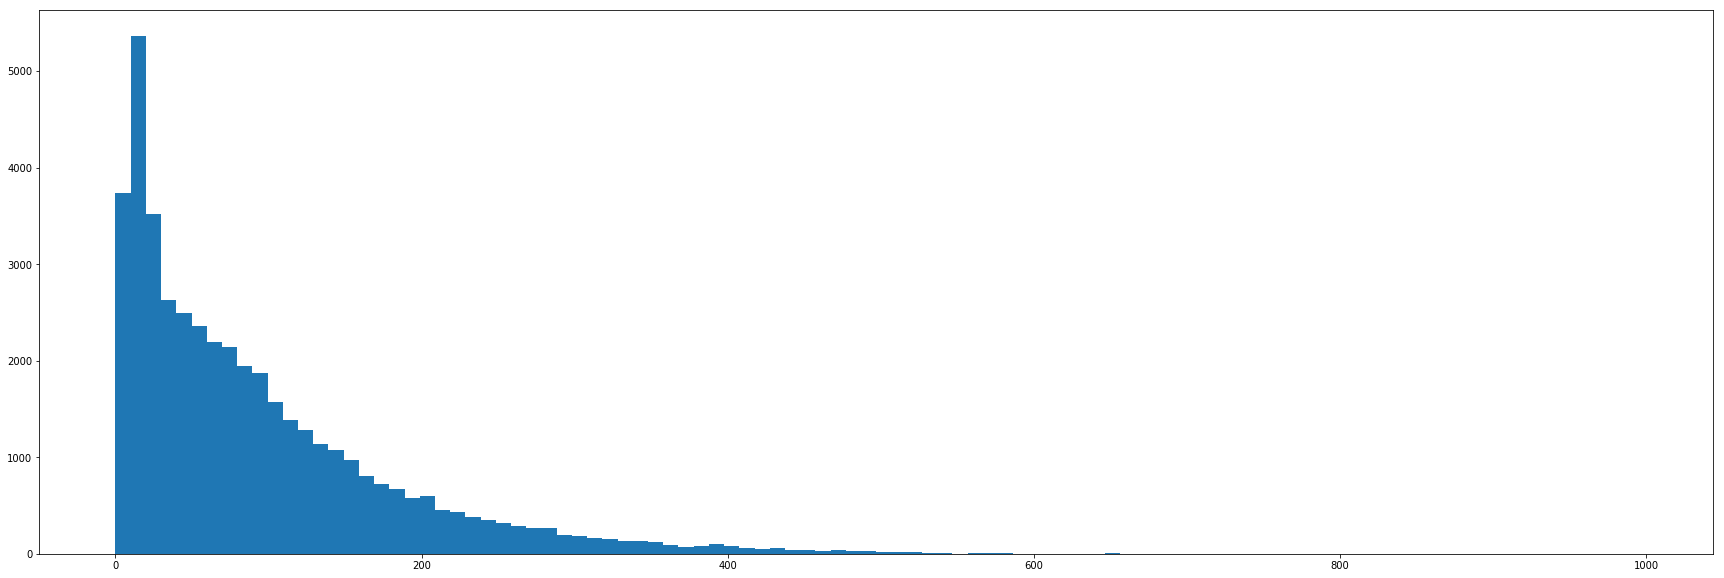

In [129]:
#Basic count
print(air_pollution.pollution.describe())
plt.hist(air_pollution.pollution,bins=100)
pass

In [130]:
#Replace 0 values (we interpretate they are wrong measurements) with the interpollation 
air_pollution.pollution = air_pollution.pollution.replace(0,np.nan).interpolate()


In [131]:
### Peek look at the pollution series

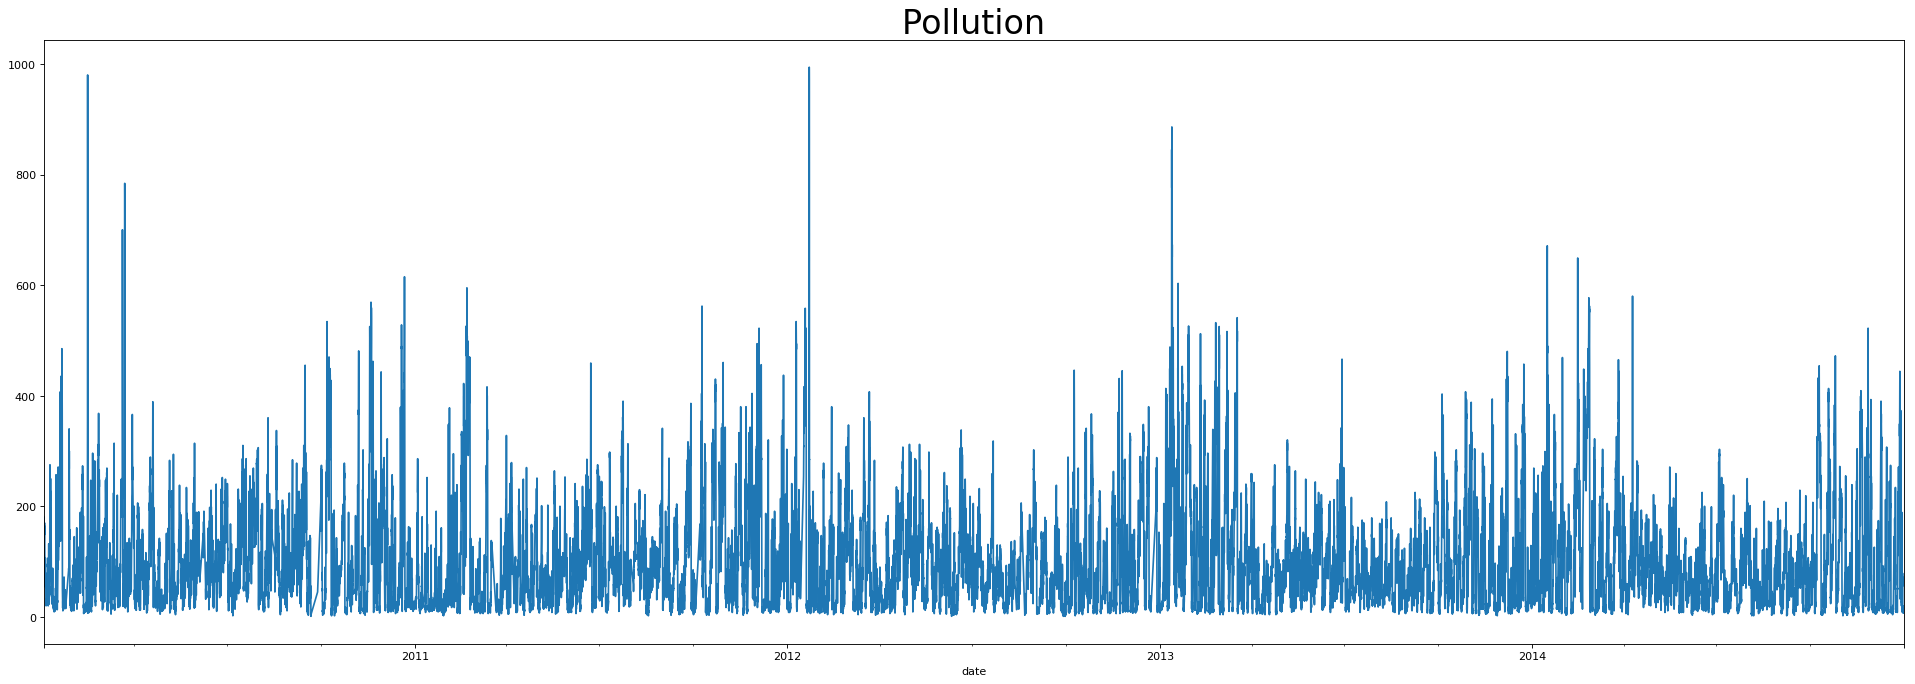

In [132]:
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Pollution',fontsize=30)

air_pollution.pollution.plot()

We will focus our analysis on the target variable `pollution`. Lets plot our target variable daily accumulative (plotting hourly will be hard to interpretate 

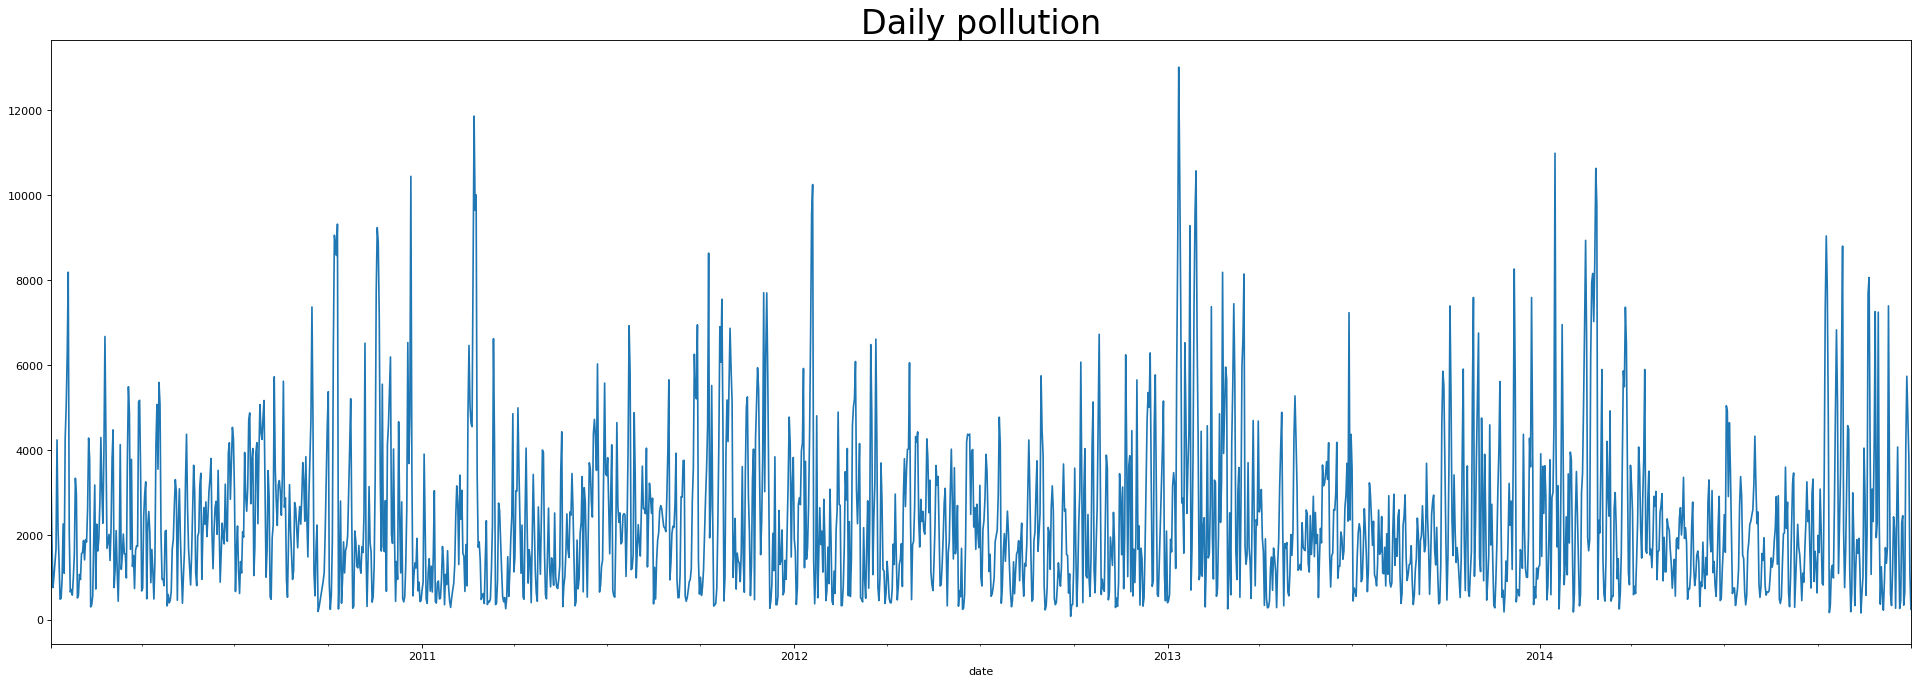

In [133]:
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Daily pollution',fontsize=30)

daily  = air_pollution.resample('D').sum()
daily.pollution.plot()

Lets look at hourly pollution for the year 2011

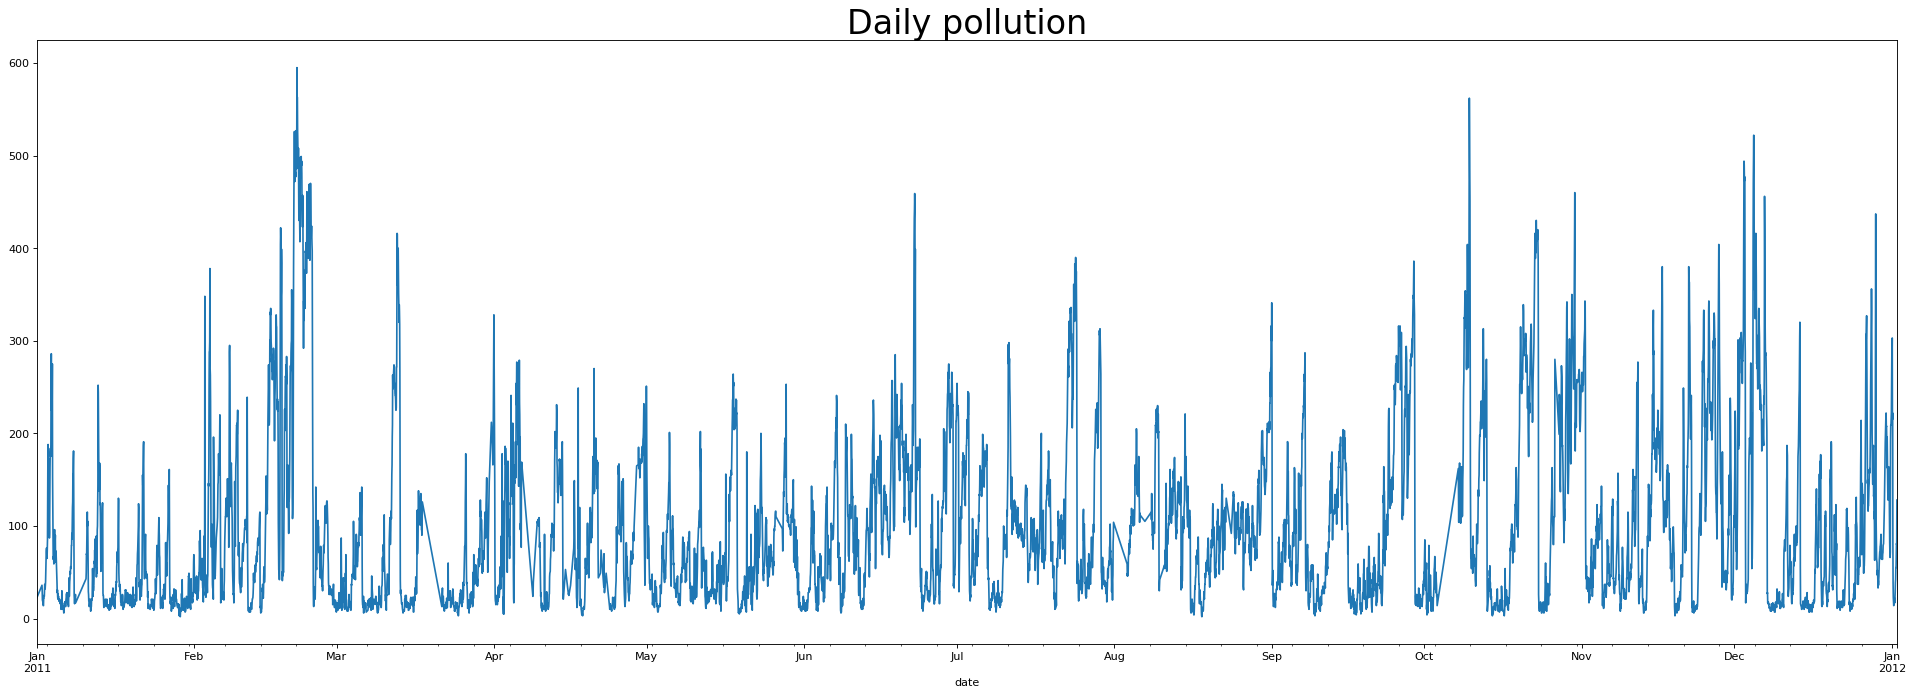

In [134]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Daily pollution',fontsize=30)

hourly  = air_pollution.loc['2011-01-01':'2012-01-01']
hourly.pollution.plot()

# Time series basic analysis

In [136]:
air_pollution = air_pollution.resample('D').sum()

## Seasonality
Seasonality refers to periodic fluctuations. For example, electricity consumption is high during the day and low during night, or online sales increase during Christmas before slowing down again.


We can check for seasonality by trying to identify trends in our time series. One way is to decompose the series 

<Figure size 2400x800 with 0 Axes>

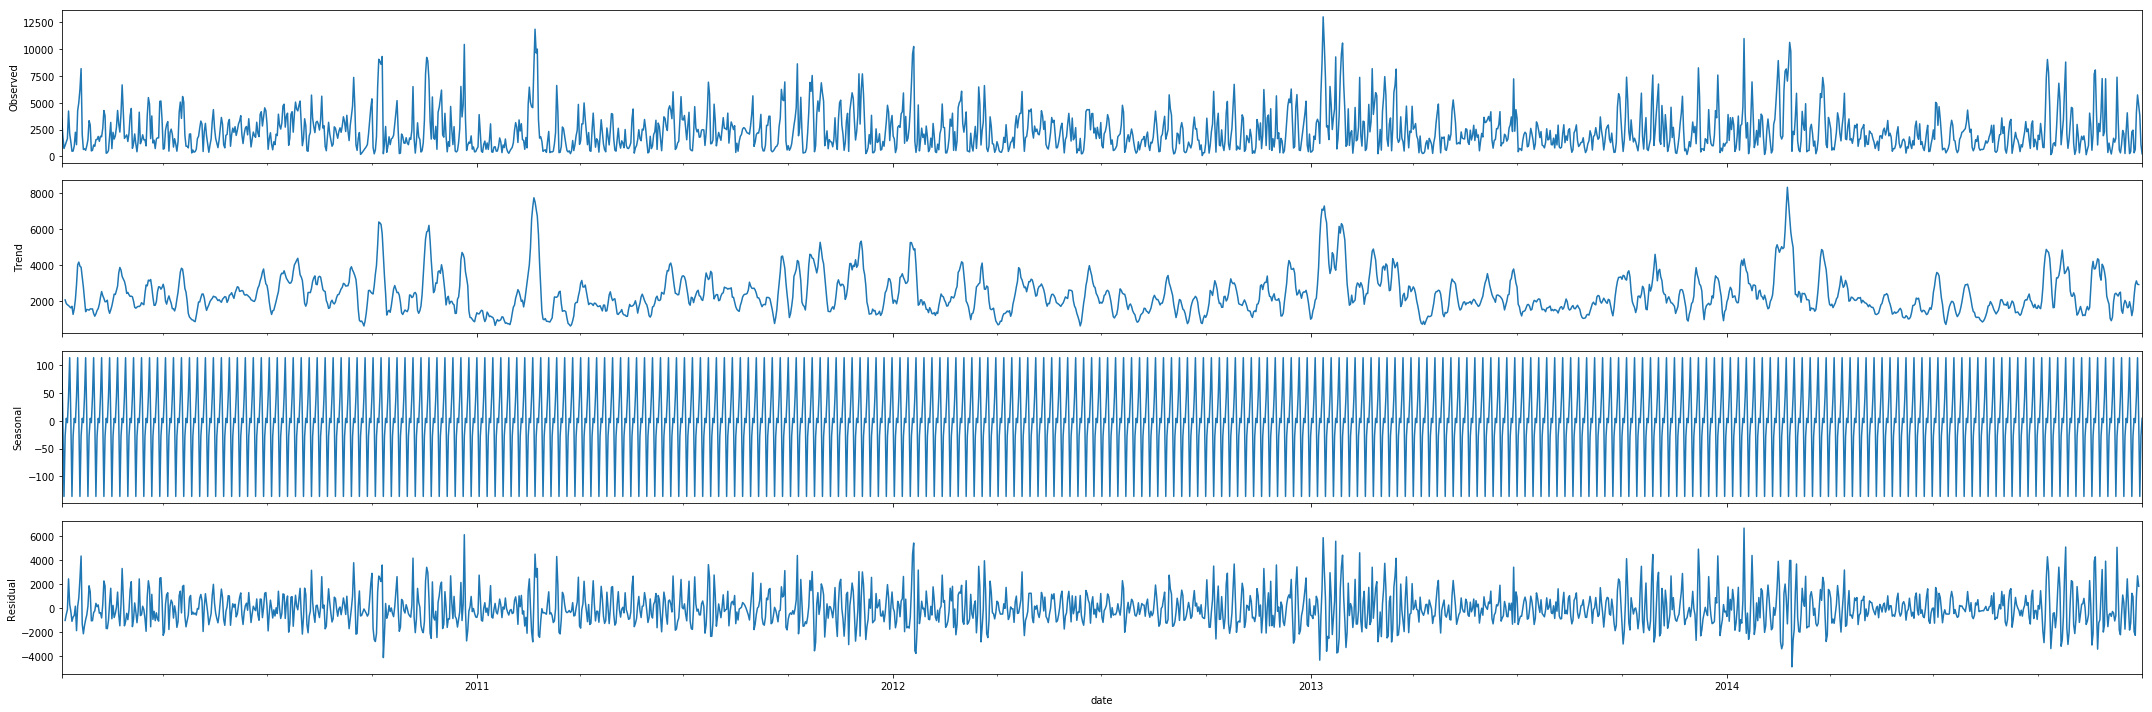

In [137]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl
mpl.rc("figure", figsize=(30,10))
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
series = air_pollution.pollution
result = seasonal_decompose(series, model='additive')
result.plot()
pass

## Stationarity
Stationarity is an important characteristic of time series. A time series is said to be stationary if its statistical properties do not change over time. In other words, it has constant mean and variance, and covariance is independent of time.

Often, stock prices are not a stationary process, since we might see a growing trend, or its volatility might increase over time (meaning that variance is changing).

Ideally, we want to have a stationary time series for modelling. Of course, not all of them are stationary, but we can make different transformations to make them stationary.

### Check for sationarity

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
Below is an example of calculating the Augmented Dickey-Fuller test on the Daily Female Births dataset. The statsmodels library provides the adfuller() function that implements the test.


In [138]:
from statsmodels.tsa.stattools import adfuller
X = air_pollution.pollution.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.116719
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


## Autocorrelation 

Informally, autocorrelation is the similarity between observations as a function of the time lag between them. This is a hint for seasonality

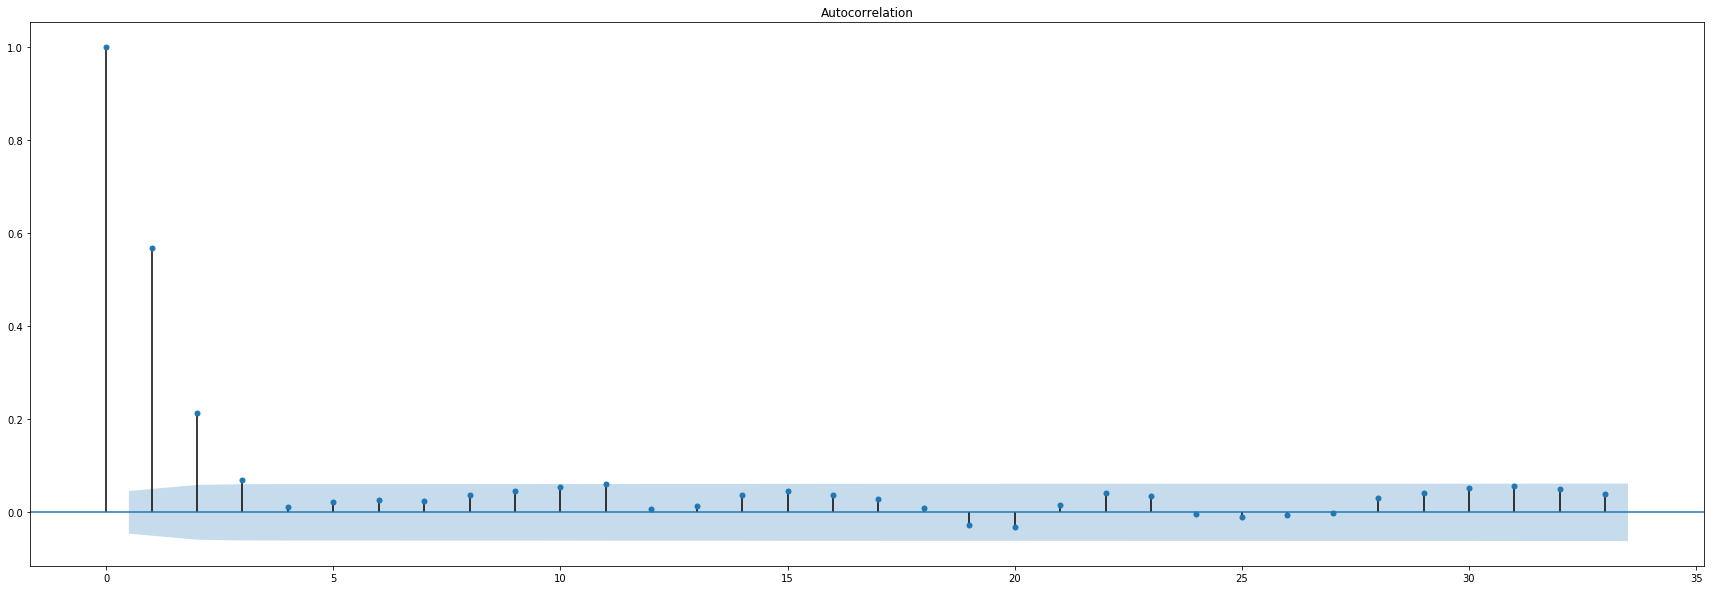

In [139]:
from statsmodels.graphics.tsaplots import plot_acf
series = air_pollution.pollution
plot_acf(series)
pass

  

# Evaluation Metrics

There are many measures that can be used to analyze the performance of a prediction:

* Geometric Mean Absolute Error (GMAE)
* Geometric Mean Relative Absolute Error (GMRAE)
* Integral Normalized Root Squared Error (INRSE)
* Mean Absolute Error (MAE) / Mean Absolute Deviation (MAD)
* Mean Absolute Percentage Error (MAPE)
* Mean Absolute Scaled Error (MASE)
* Mean Arctangent Absolute Percentage Error (MAAPE)
* Mean Bounded Relative Absolute Error (MBRAE)
* Mean Directional Accuracy (MDA)
* Mean Error (ME)
* Mean Percentage Error (MPE)
* Mean Relative Absolute Error (MRAE)
* Mean Relative Error (MRE)
* Mean Squared Error (MSE)
* Median Absolute Error (MDAE)
* Median Absolute Percentage Error (MDAPE)
* Median Relative Absolute Error (MDRAE)
* Normalized Absolute Error
* Normalized Absolute Percentage Error
* Normalized Root Mean Squared Error (NRMSE)
* Relative Absolute Error (RAE)
* Root Mean Squared Error (RMSE)
* Root Mean Squared Percentage Error (RMSPE)
* Root Mean Squared Scaled Error (RMSSE)
* Root Median Squared Percentage Error (RMSPE)
* Root Relative Squared Error (RRSE)
* Symmetric Mean Absolute Percentage Error (MAPE)
* Symmetric Median Absolute Percentage Error (SMDAPE)
* Unscaled Mean Bounded Relative Absolute Error (UMBRAE)



# Additional resources and literature
## Papers

|| |
| - | - |
| Adhikari, R., & Agrawal, R. K. (2013). An introductory study on time series modeling and forecasting.|[[1]](https://arxiv.org/ftp/arxiv/papers/1302/1302.6613.pdf)|